In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data

#import pandas as pd

#from google.colab import files
#uploaded = files.upload()

cars = pd.read_csv("Cars.csv")
cars.head()


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


C:\Users\Bhanu Priya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhanu Priya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhanu Priya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhanu Priya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

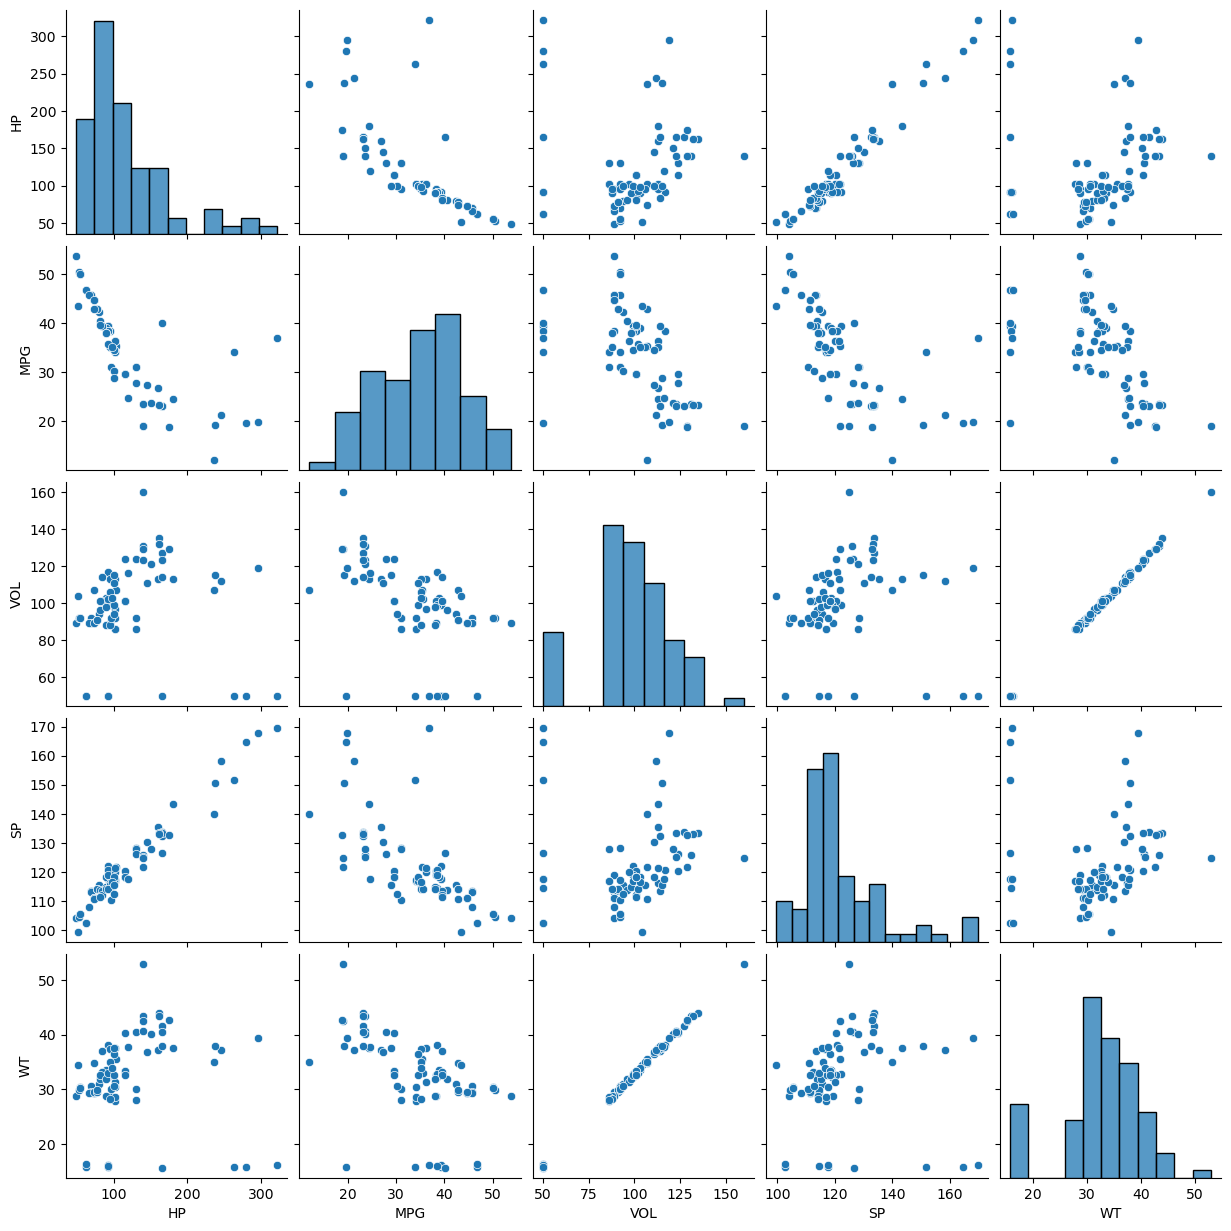

In [4]:
# scatter matrix, corelation matrix , pairplot,pd.plotting.scatter_matrix.
sns.pairplot(cars)

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [6]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [6]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Preparing a model

In [7]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [8]:
#Coefficients
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.54e-23
Time:                        12:30:00   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

# Simple Linear Regression Models.

In [9]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()
#t and p-Values
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           3.82e-07
Time:                        12:35:25   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
ml_w=smf.ols('MPG~WT',data = cars).fit()
#print(ml_w.tvalues, '\n', ml_w.pvalues)
ml_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           4.38e-07
Time:                        12:35:57   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()
ml_wv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           2.43e-06
Time:                        12:36:17   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation Matrix

In [14]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


C:\Users\Bhanu Priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


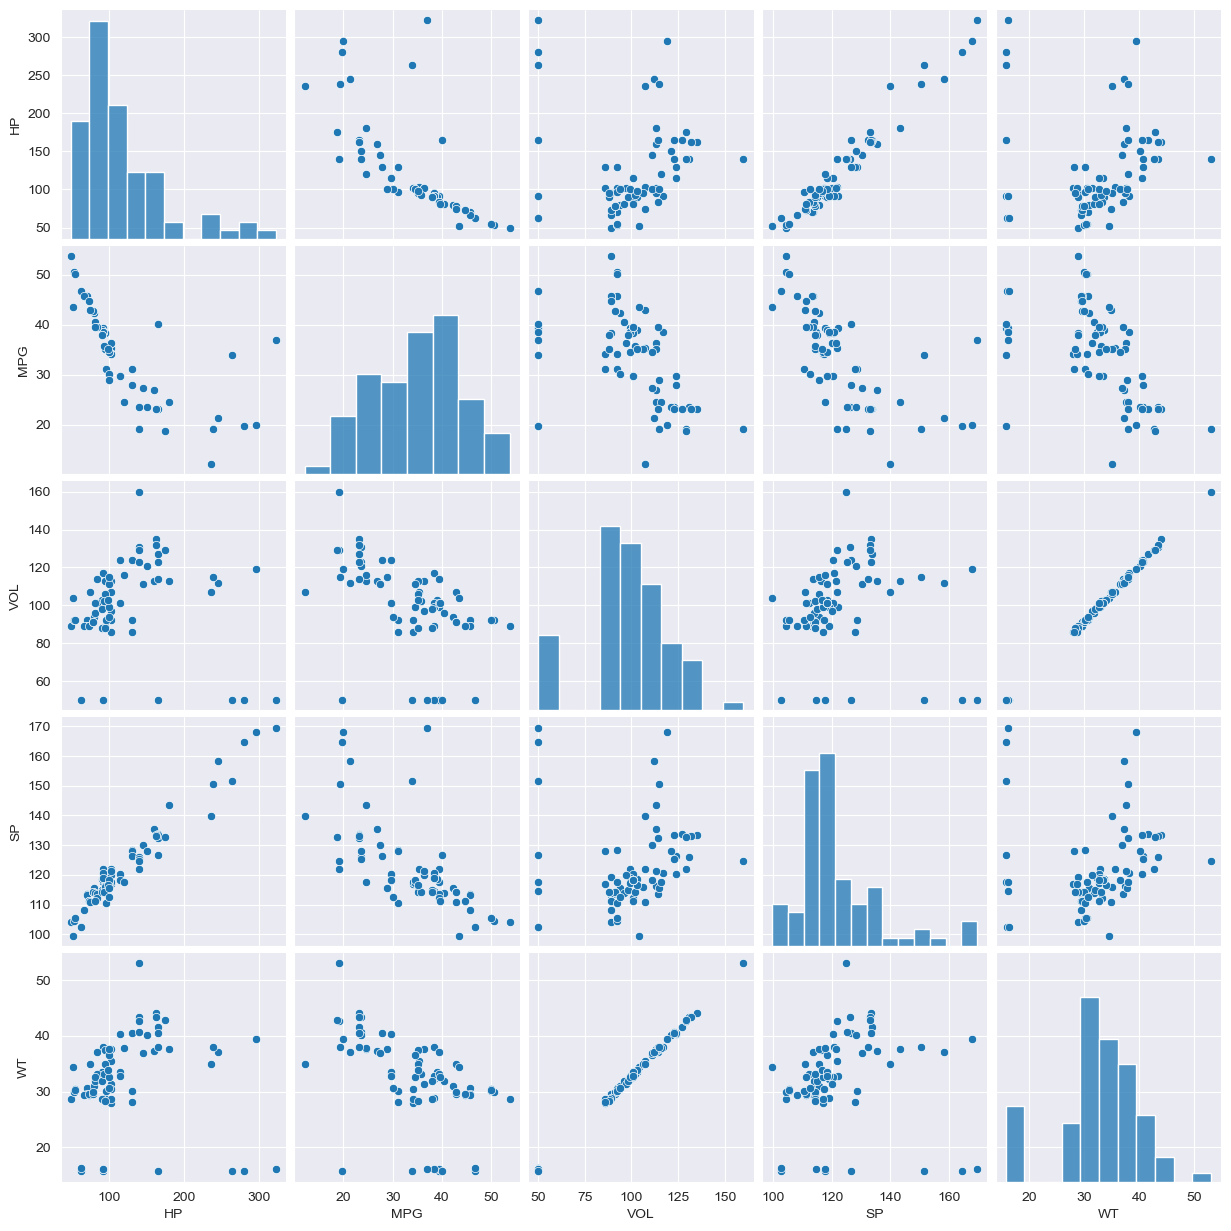

In [15]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Calculating VIF

In [12]:
rsq_hp = smf.ols('HP~WT+SP+VOL',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


## Subset Slection

### AIC


In [13]:
#Build model with Wt
import statsmodels.formula.api as smf
model_wt1 = smf.ols('MPG~WT+SP+HP',data=cars).fit()
model_wt1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.81e-24
Time:                        12:41:51   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
SP             0.4078      0.156      2.609      0.011       0.097       0.719
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Build model with VOL
import statsmodels.formula.api as smf
model_vol1 = smf.ols('MPG~VOL+SP+HP',data=cars).fit()
model_vol1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.56e-24
Time:                        12:42:22   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
predictions=model_vol1.predict(cars)
predictions
actual=cars.MPG
errors=actual-predictions
pred_actual=pd.DataFrame(predictions,columns=["prediction"])
pred_actual["actual"]=actual
pred_actual["errors"]=errors

pred_actual.iloc[76]

prediction    21.233143
actual        36.900000
errors        15.666857
Name: 76, dtype: float64

In [19]:
errors.mean()

-1.7697777399950645e-14

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

In [18]:
#mean of the errors
model_vol1.resid.mean()

-1.7697777399950645e-14

In [20]:
model_vol1.resid_pearson.mean()

-3.951571580239909e-15

<Axes: ylabel='Density'>

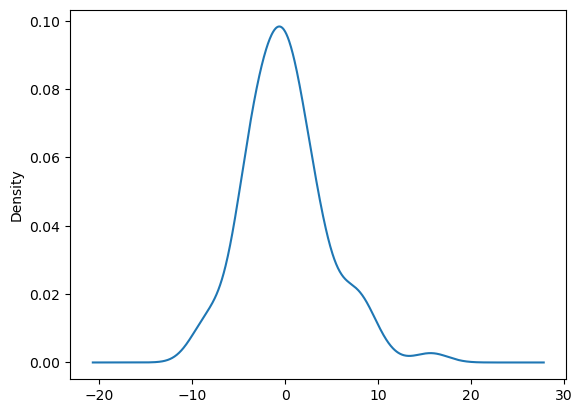

In [21]:
model_vol1.resid.plot(kind='kde')

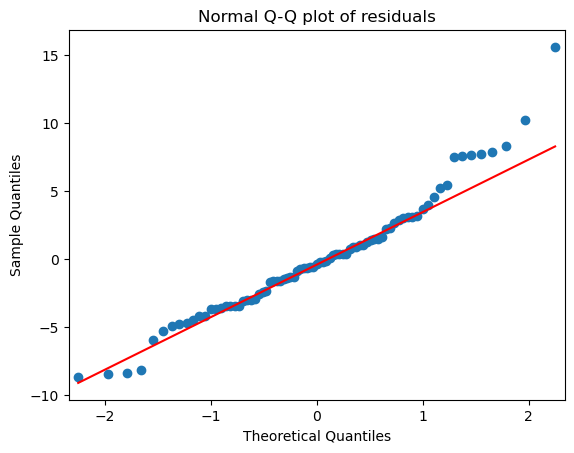

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

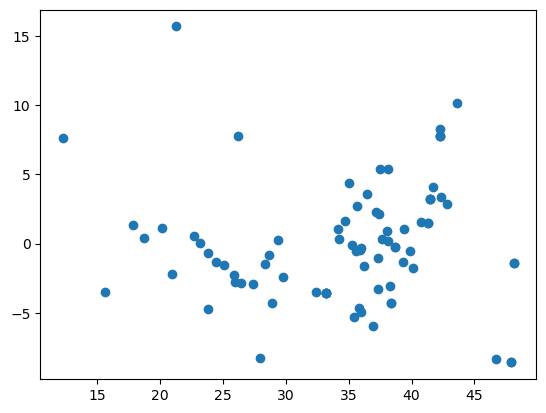

In [22]:
plt.scatter(model_vol1.fittedvalues,model_vol1.resid)

In [23]:
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

In [ ]:
pred

In [26]:
cars.iloc[70:78,]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
71,162,23.203569,135,133.415985,44.013139
72,162,23.203569,132,133.140074,43.353123
73,140,19.086341,160,124.715241,52.997752
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113


## Residual Plot for Homoscedasticity

In [26]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

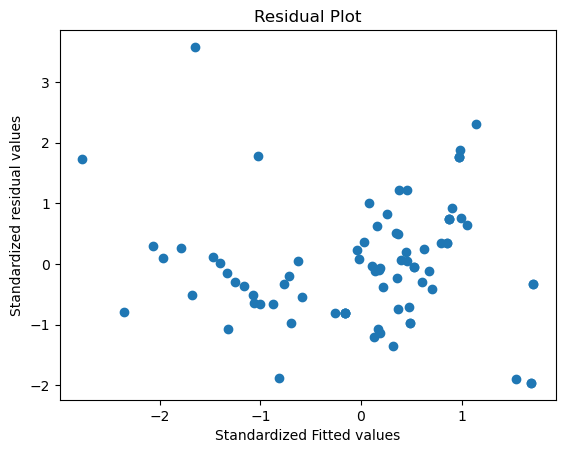

In [27]:
#plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model_vol1.fittedvalues),
            get_standardized_values(model_vol1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

In [29]:
import statsmodels.api as sm

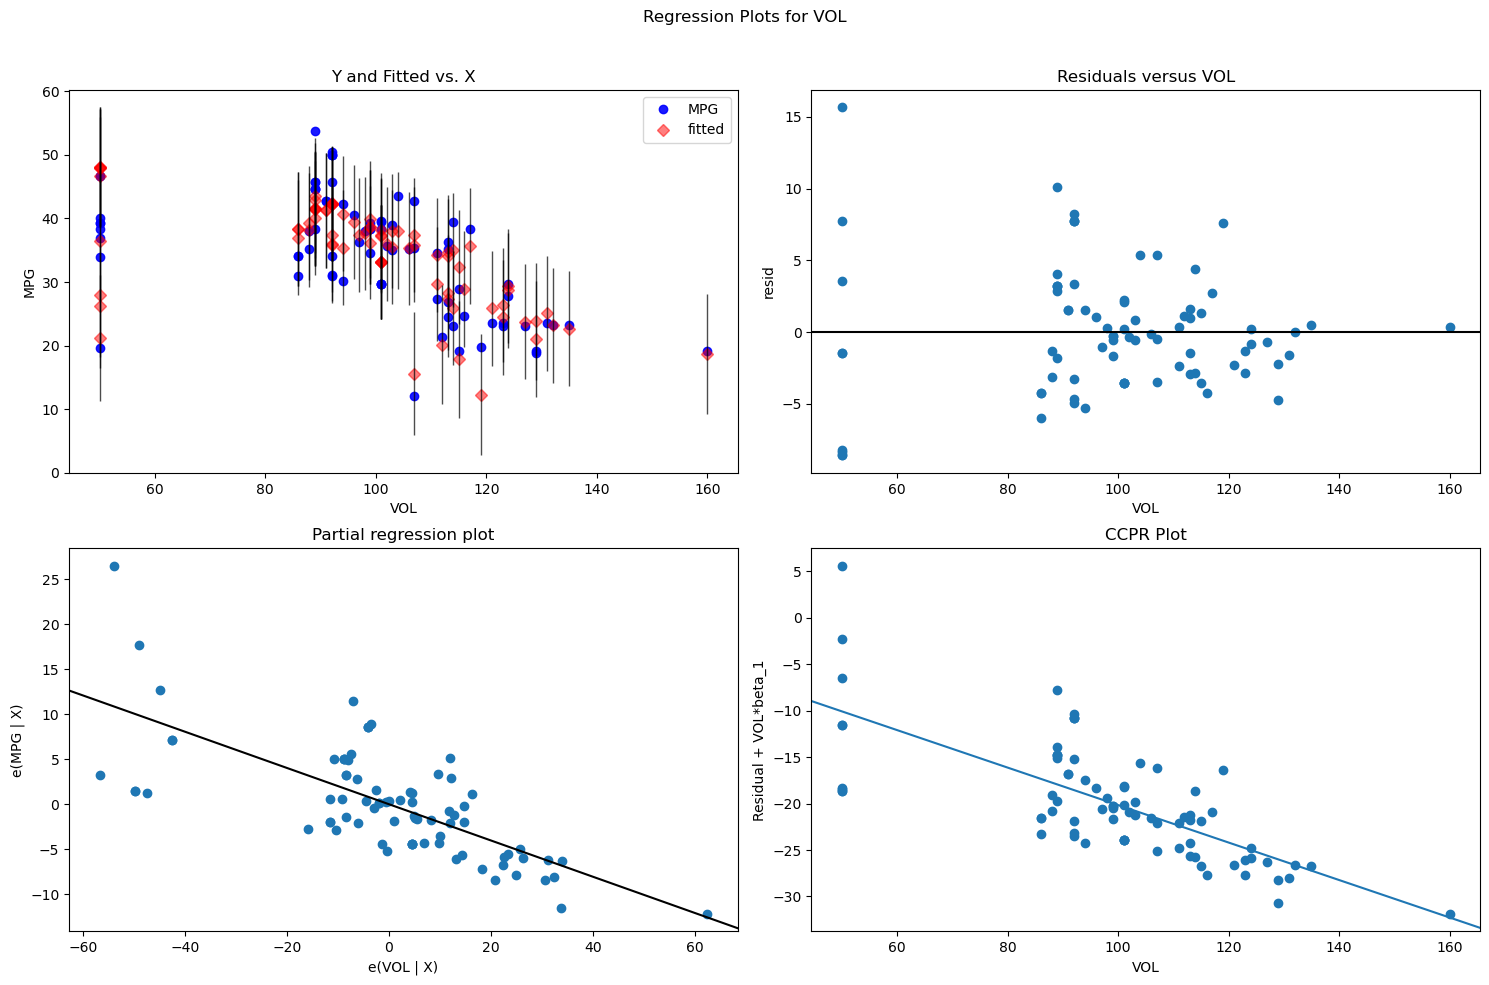

In [28]:

fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_vol1, "SP", fig=fig)
plt.show()

## CCPR - component plus residual plot
# A component residual plot adds a line indicating where the line of best fit lies.
# A significant difference between the residual line and the component line
# indicates that the predictor does not have a linear relationship with the dependent variable.

C:\Users\Bhanu Priya\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


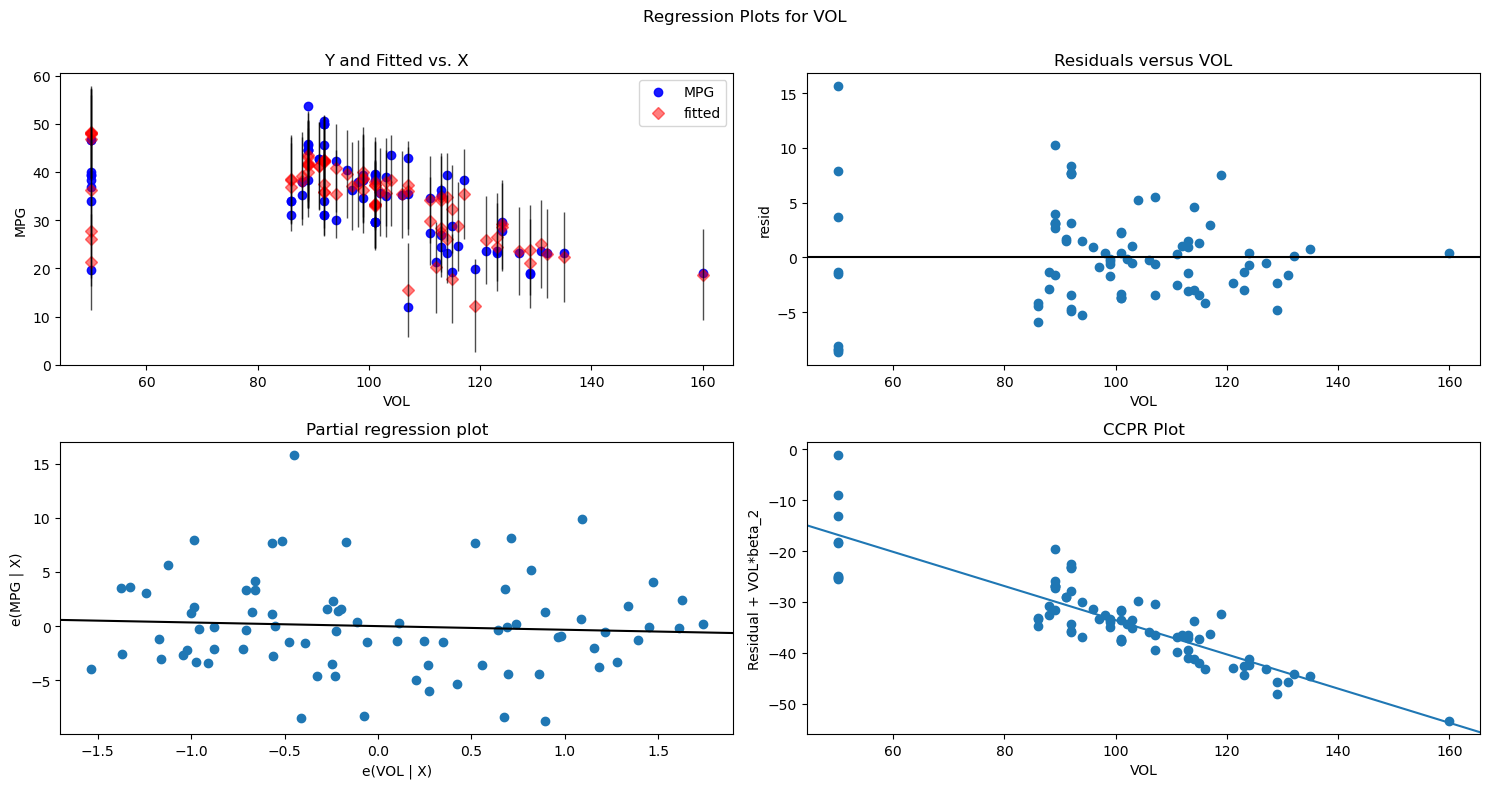

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

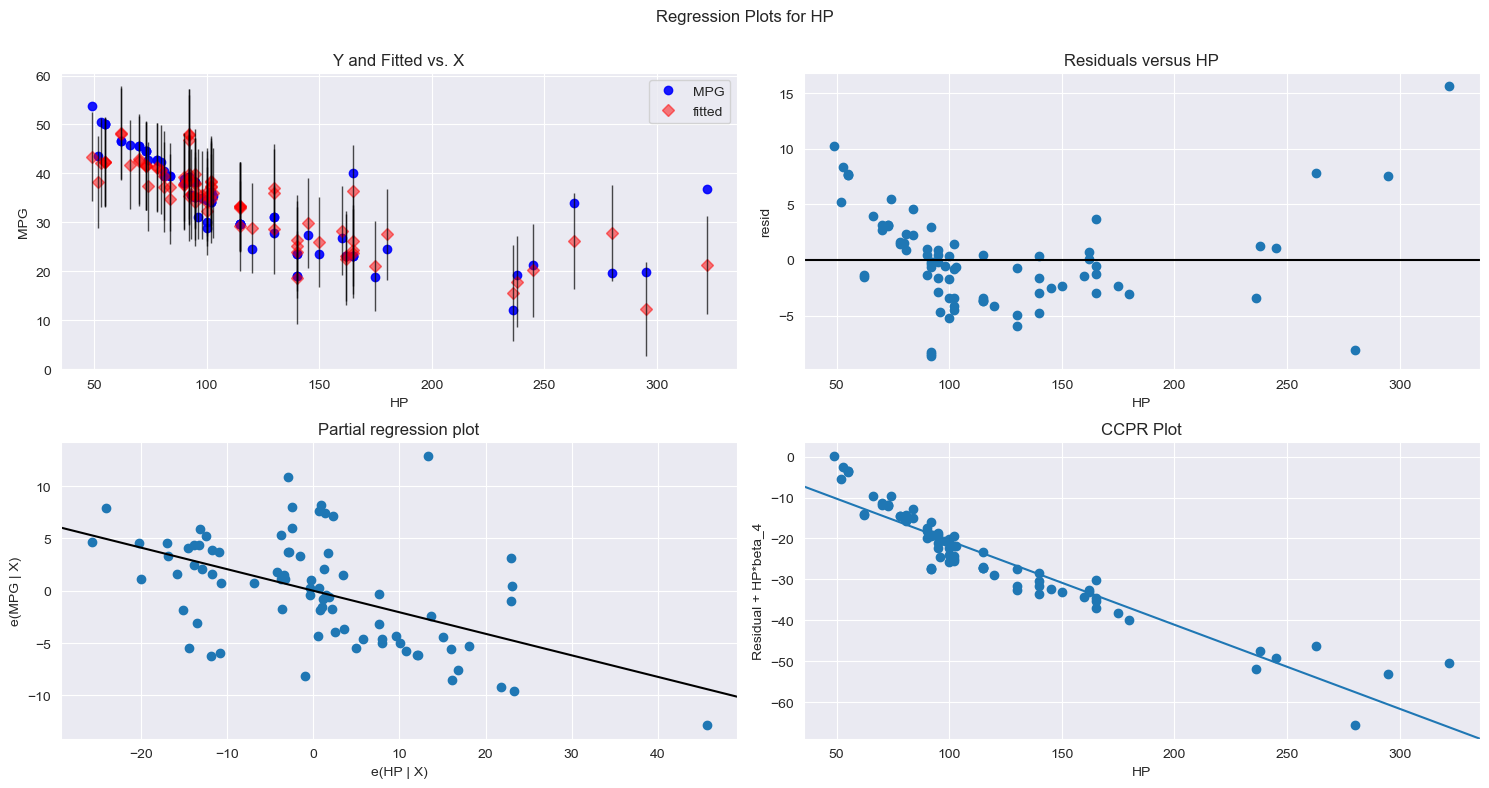

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

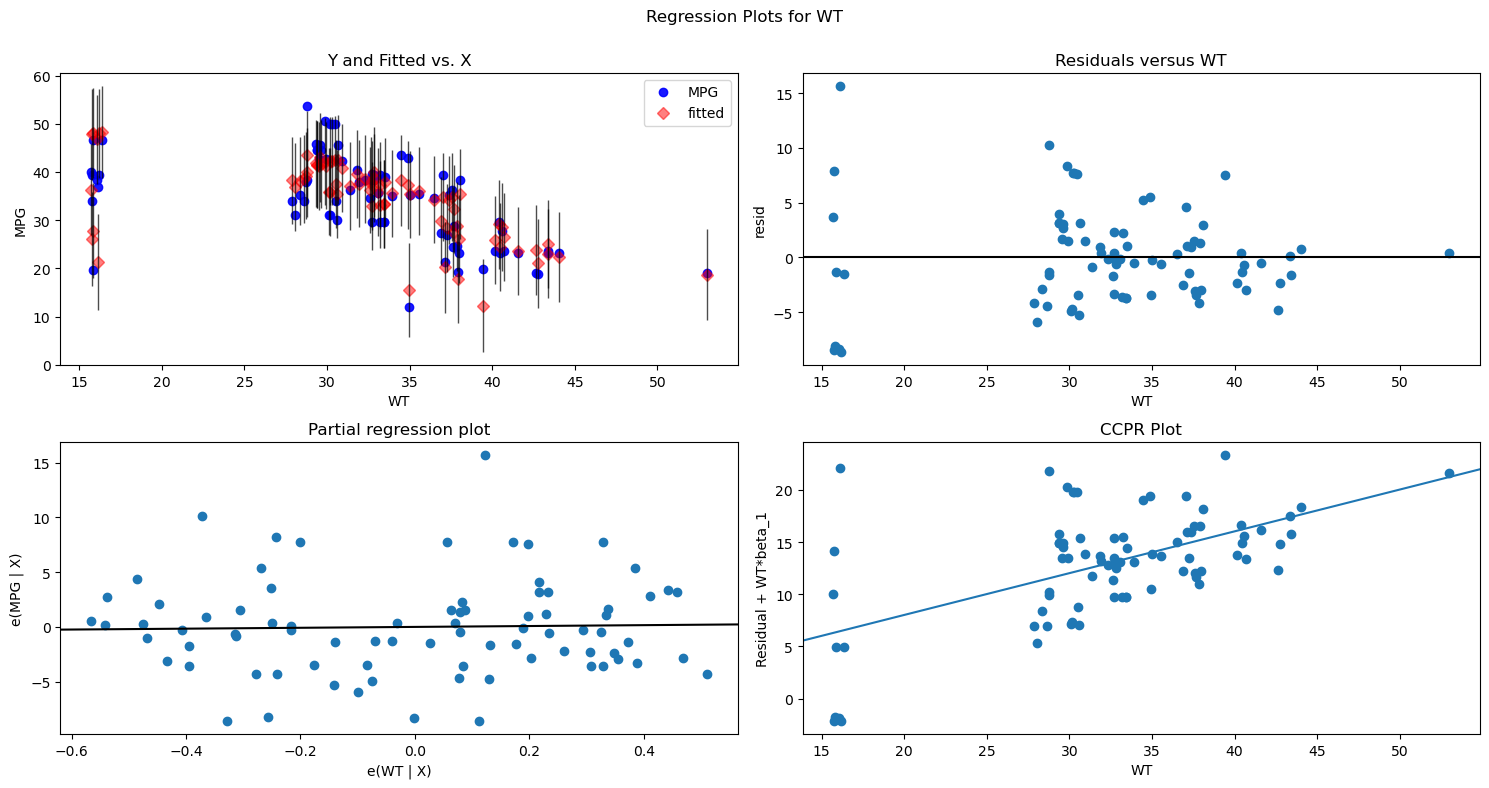

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# Model Deletion Diagnostics






## Detecting Influencers/Outliers

## Cook’s Distance

In [32]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model_vol1.get_influence()
(c, _) = model_influence.cooks_distance

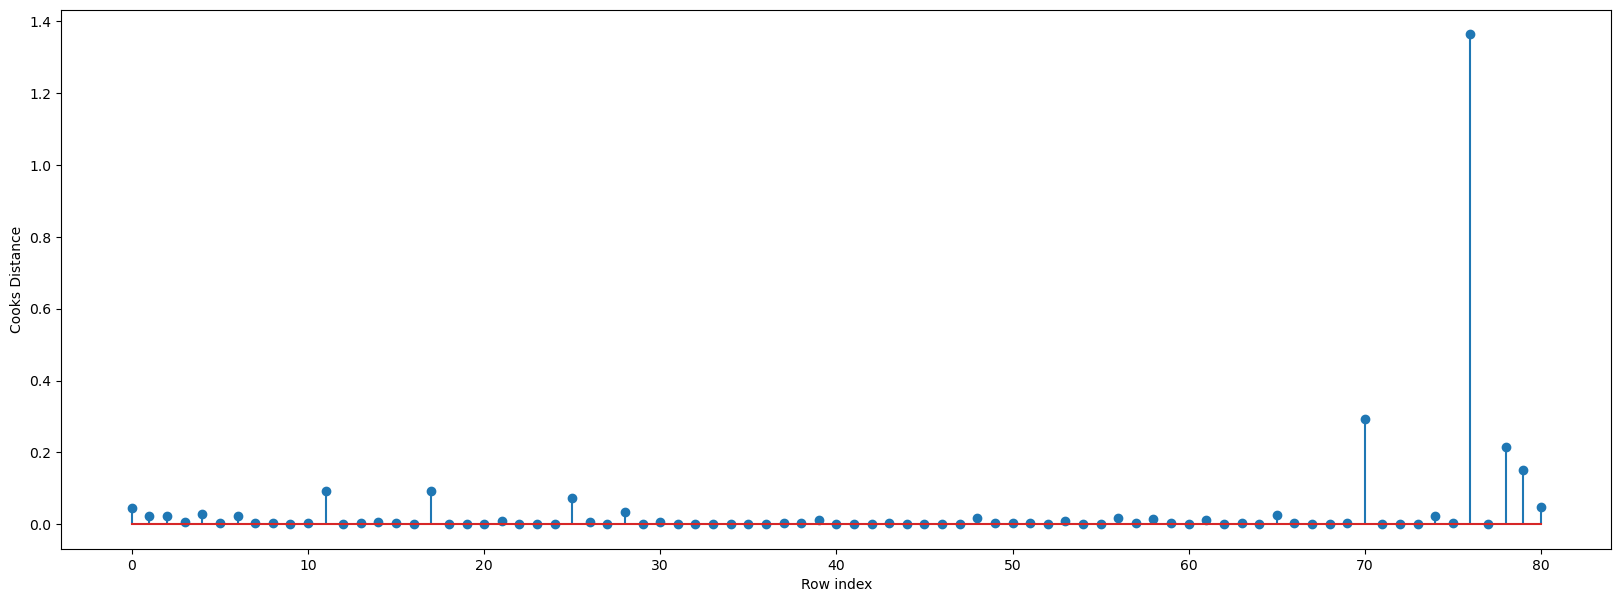

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.3641743869103269)

## High Influence points

In [ ]:
cars.shape

In [35]:
k = 3
n = 81
leverage_cutoff = 3*(k + 1)/n
leverage_cutoff

0.14814814814814814

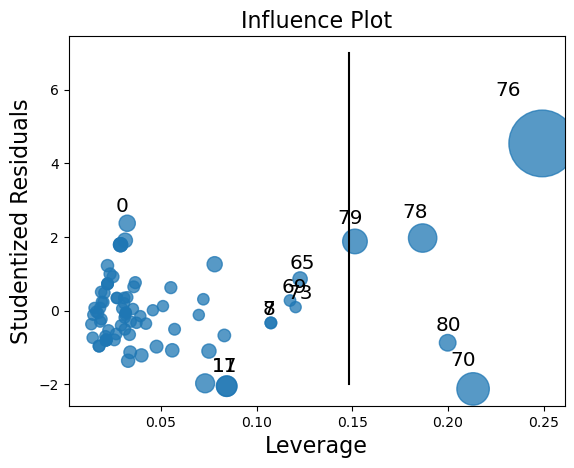

In [37]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model_vol1)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,color='black')

plt.show()



<HTML>

<em color='green'><strong> From the above plot, it is evident that data point 70 and 76 are the influencers</em>


In [38]:
#cars[cars.index.isin([70, 76])]
cars.iloc[[70,76],:]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [68]:
#See the differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [5]:
#Read the data

import pandas as pd

#from google.colab import files
#uploaded = files.upload()

cars_new = pd.read_csv("Cars.csv")
cars_new.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [39]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars.drop(cars.index[[70,76]],axis=0).reset_index()

In [40]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [41]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [42]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Build Model

In [43]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [44]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.65e-27
Time:                        13:26:34   Log-Likelihood:                -219.06
No. Observations:                  79   AIC:                             446.1
Df Residuals:                      75   BIC:                             455.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5275     13.051      1.956      0.054      -0.471      51.526
VOL           -0.1825      0.023     -8.012      0.000      -0.228      -0.137
SP             0.4415      0.141      3.124      0.003       0.160       0.723
HP            -0.2291      0.035     -6.592      0.000      -0.298      -0.160
==============================================================================
Omnibus:                        6.541   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.833
Skew:                           0.620   Prob(JB):                       0.0541
Kurtosis:                       3.485   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.8161692010376007, 446.11722639447726, 455.59501780434533)

In [47]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [48]:
(final_ml_W.rsquared,final_ml_W.aic,final_ml_W.bic)

(0.8160034320495305, 446.1884323575031, 455.66622376737115)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

In [49]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

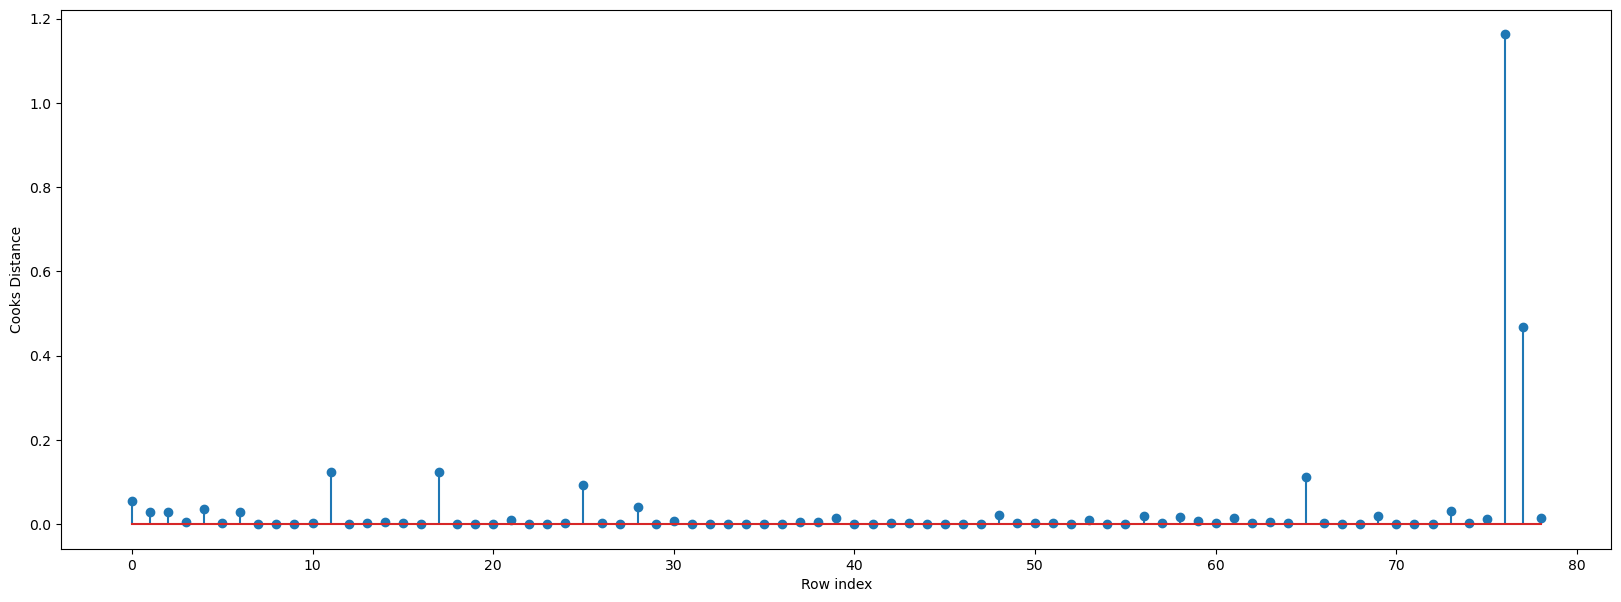

In [50]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [51]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135182)

In [52]:
#Drop 76 and 77 observations
car2=car1.drop(car1.index[[76,77]],axis=0)

In [53]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [54]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [55]:
car4=car3.drop(['index'],axis=1)

In [56]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [57]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           6.81e-32
Time:                        13:29:39   Log-Likelihood:                -200.71
No. Observations:                  77   AIC:                             409.4
Df Residuals:                      73   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2974     11.336      2.232      0.029       2.706      47.889
VOL           -0.1362      0.021     -6.366      0.000      -0.179      -0.094
SP             0.4335      0.122      3.560      0.001       0.191       0.676
HP            -0.2635      0.031     -8.634      0.000      -0.324      -0.203
==============================================================================
Omnibus:                        9.478   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.184
Skew:                           0.770   Prob(JB):                       0.0101
Kurtosis:                       3.703   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

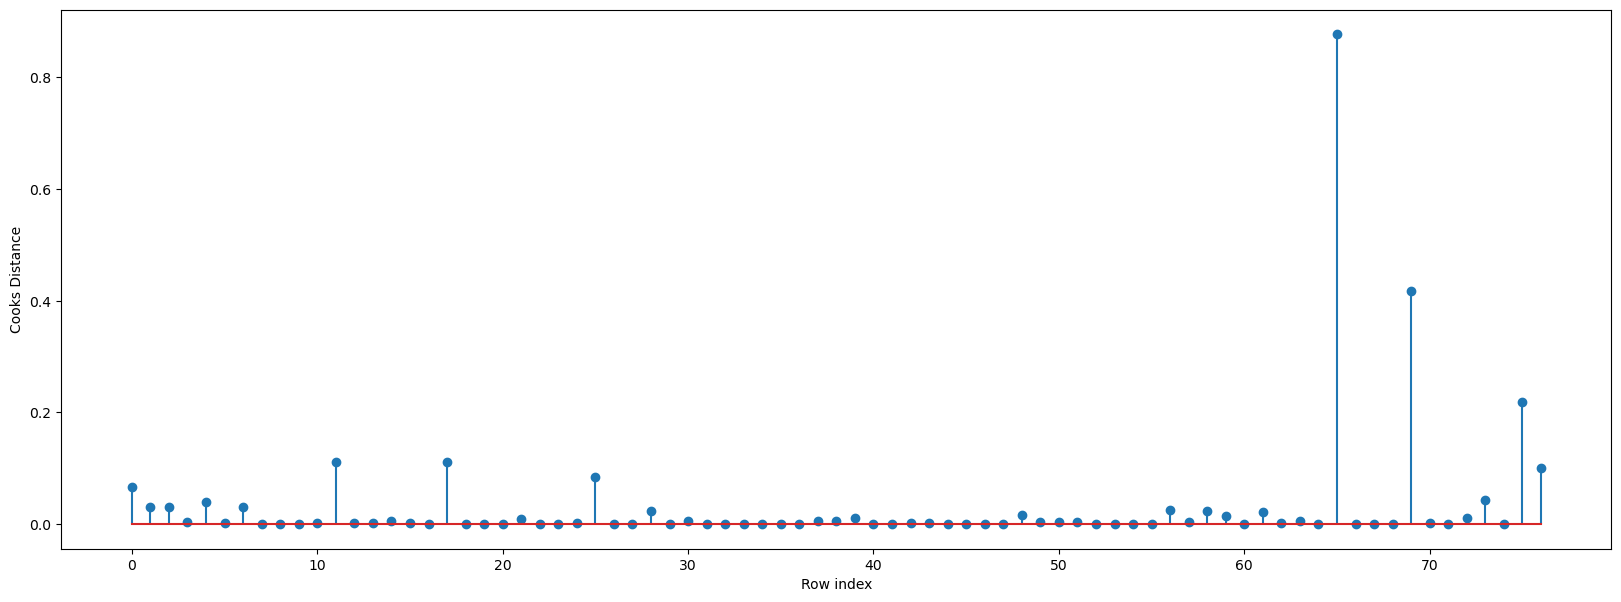

In [57]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [58]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296786)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [58]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [59]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8669636111859063, 409.4153062719507)

In [60]:
final_ml_V.resid.mean()

1.1004184576544409e-14

<Axes: ylabel='Frequency'>

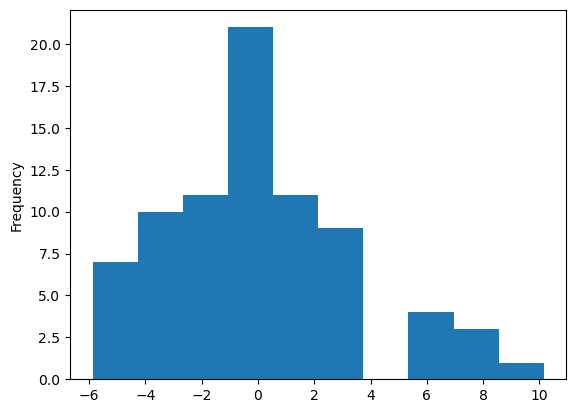

In [61]:
final_ml_V.resid.plot(kind='hist')

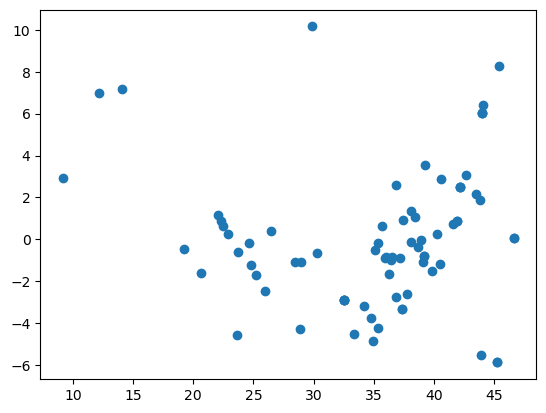

In [62]:
plt.scatter(final_ml_V.fittedvalues,final_ml_V.resid)

<Axes: ylabel='Frequency'>

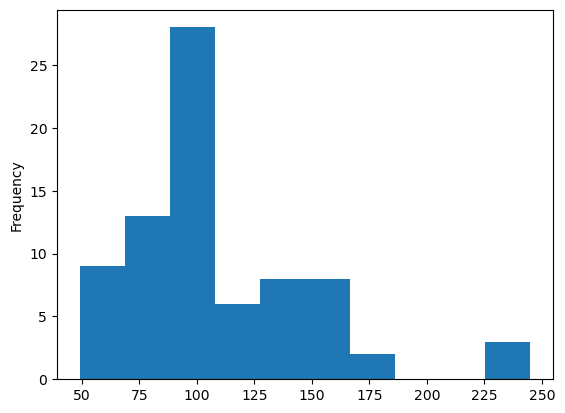

In [63]:
car4.HP.plot(kind="hist")


In [64]:
car4["log_hp"]=np.log(car4.HP)

car4.head()

car4.corr()

,HP,MPG,VOL,SP,WT,log_hp
HP,1.000000,-0.882314,0.464684,0.953300,0.464783,0.971804
MPG,-0.882314,1.000000,-0.636420,-0.804580,-0.635163,-0.929203
VOL,0.464684,-0.636420,1.000000,0.474343,0.999033,0.490220
SP,0.953300,-0.804580,0.474343,1.000000,0.476120,0.939014
WT,0.464783,-0.635163,0.999033,0.476120,1.000000,0.489047
log_hp,0.971804,-0.929203,0.490220,0.939014,0.489047,1.000000


<Axes: ylabel='Frequency'>

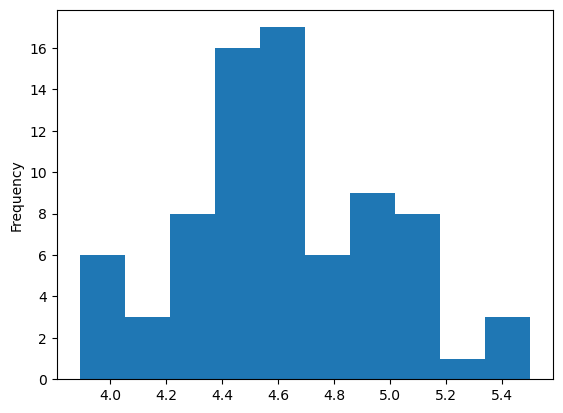

In [65]:
car4.log_hp.plot(kind="hist")


## Predicting for new data

In [66]:
#model with transformed hp variable
model_loghp= smf.ols('MPG~VOL+SP+log_hp',data = car4).fit()
model_loghp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     458.2
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           2.98e-47
Time:                        13:32:52   Log-Likelihood:                -163.36
No. Observations:                  77   AIC:                             334.7
Df Residuals:                      73   BIC:                             344.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    143.9559      3.134     45.929      0.000     137.709     150.203
VOL           -0.1099      0.013     -8.258      0.000      -0.136      -0.083
SP             0.5169      0.065      7.897      0.000       0.386       0.647
log_hp       -34.5918      1.945    -17.784      0.000     -38.468     -30.715
==============================================================================
Omnibus:                       80.551   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1221.303
Skew:                           2.900   Prob(JB):                    6.27e-266
Kurtosis:                      21.628   Cond. No.                     2.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
model_loghp.resid.mean()

-9.066340751744136e-15

<Axes: ylabel='Frequency'>

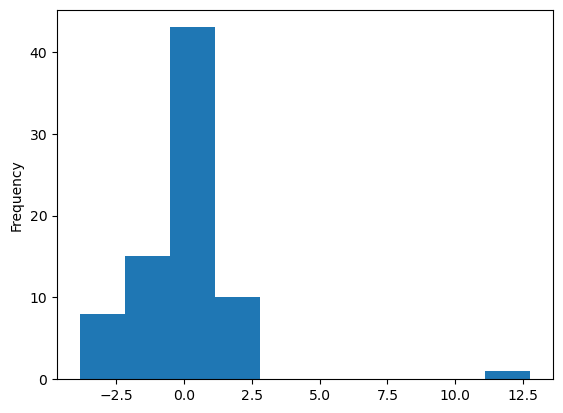

In [68]:
model_loghp.resid.plot(kind="hist")

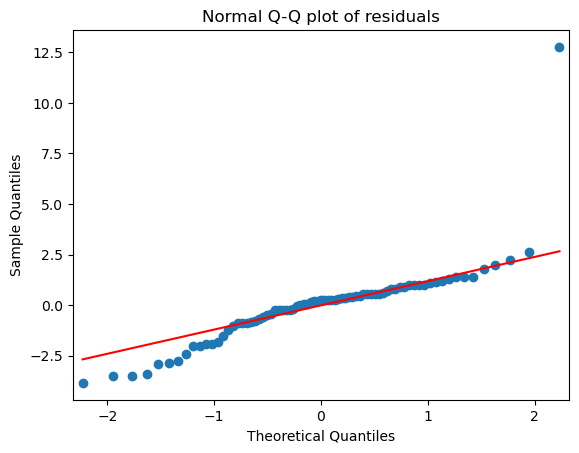

In [66]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_loghp.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

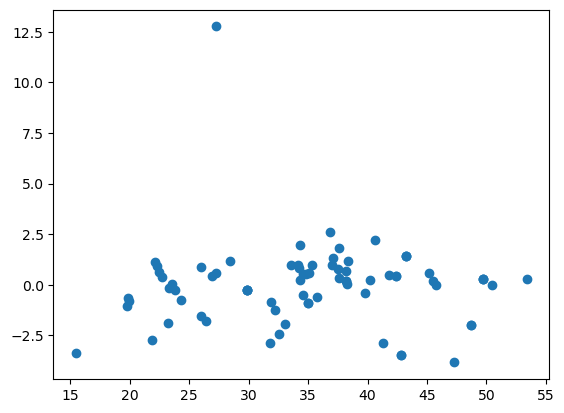

In [69]:
plt.scatter(model_loghp.fittedvalues,model_loghp.resid)

In [17]:
# RMSE

def rmse(errors):
    return (np.sqrt(np.mean(errors*errors)))




In [35]:
#New data for prediction
new_data=pd.DataFrame({'HP':80,"VOL":96,"SP":103,"WT":35},index=[1])
new_data["log_hp"]=np.log(new_data.HP)
new_data

,HP,VOL,SP,WT,log_hp
1,80,96,103,35,4.382027


In [36]:
model_loghp.predict(new_data)

1    35.06862
dtype: float64

# cross validation

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
train,test=train_test_split(car4,test_size=0.2,random_state=7)
print(train.shape, test.shape)

(61, 6) (16, 6)


In [72]:
import statsmodels.formula.api as smf
model_loghp= smf.ols('MPG~VOL+SP+log_hp',data = train).fit()
model_loghp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     359.6
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           5.52e-37
Time:                        13:54:03   Log-Likelihood:                -132.16
No. Observations:                  61   AIC:                             272.3
Df Residuals:                      57   BIC:                             280.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    143.0124      3.526     40.555      0.000     135.951     150.074
VOL           -0.1194      0.015     -7.752      0.000      -0.150      -0.089
SP             0.5004      0.074      6.733      0.000       0.352       0.649
log_hp       -33.7568      2.203    -15.323      0.000     -38.168     -29.345
==============================================================================
Omnibus:                       62.995   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              644.413
Skew:                           2.627   Prob(JB):                    1.17e-140
Kurtosis:                      18.031   Cond. No.                     2.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
def rmse(errors):
    return np.sqrt((errors*errors).mean())

In [74]:
tr_errors=model_loghp.resid
tr_rmse=rmse(tr_errors)
print(round(tr_rmse,2),"training RMSE")

2.11 training RMSE


In [75]:
test

,HP,MPG,VOL,SP,WT,log_hp
54,160,26.852279,113,135.392639,37.254392,5.075174
36,90,37.958743,88,114.093383,28.754000,4.499810
59,100,28.860225,115,115.576579,37.662874,4.605170
17,92,39.354094,50,117.598513,16.194122,4.521789
41,95,35.152727,106,115.748847,35.027176,4.553877
12,92,39.354094,99,122.105055,32.813592,4.521789
27,92,38.411003,99,119.105055,32.835069,4.521789
15,73,44.652834,89,111.185353,29.604527,4.290459
40,95,35.152727,113,116.392639,37.392524,4.553877
2,55,50.013401,92,105.461264,30.193597,4.007333


In [76]:
test_x=test.iloc[:,[0,2,3,4,5]]

In [77]:

test_errors=test.MPG-model_loghp.predict(test_x)

test_rmse=rmse(test_errors)
print(round(test_rmse,2),"test RMSE")

1.67 test RMSE


In [78]:
print(tr_rmse,test_rmse)

2.1119145181364622 1.6678337694611411


In [39]:
final_model=smf.ols('MPG~VOL+SP+log_hp',data = car4).fit()